In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KDTree
from sklearn.svm import SVR
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv("65d4f0fcb8af9_amex_campus_challenge_train_3.csv")

In [3]:
customer_columns = [col for col in df.columns if col.startswith('customer_')]
df_customer = df[customer_columns]

In [10]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12229978 entries, 0 to 12229977
Data columns (total 48 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   customer_digital_activity_04  float64
 1   customer_spend_01             float64
 2   customer_industry_spend_01    float64
 3   customer_industry_spend_02    float64
 4   customer_industry_spend_03    float64
 5   customer_industry_spend_04    float64
 6   customer_industry_spend_05    float64
 7   customer_spend_02             float64
 8   customer_spend_03             float64
 9   customer_merchant_02          float64
 10  customer_merchant_01          float64
 11  customer_spend_04             float64
 12  customer_spend_05             float64
 13  customer_spend_06             float64
 14  customer_spend_07             float64
 15  customer_merchant_03          float64
 16  customer_profile_01           float64
 17  customer_profile_02           float64
 18  customer_digital_act

In [9]:
df_customer = df_customer.fillna(df_customer.mean())

In [11]:
df_customer.head(10)

,customer_digital_activity_04,customer_spend_01,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_spend_02,customer_spend_03,customer_merchant_02,...,customer_digital_activity_19,customer_digital_activity_20,customer_spend_18,customer_spend_19,customer_digital_activity_21,customer_digital_activity_22,customer_digital_activity_01,customer_profile_03,customer_digital_activity_02,customer_profile_04
0,9.745803,107.215862,26.686594,74.000000,3682.750000,138.000000,111.000000,14.000000,133.000000,1.7469,...,10.000000,0.444444,0.714531,20.850000,0.017921,0.000468,0.000000,58.434969,32.500000,86.0
1,9.745803,35.552000,50.928261,3.000000,1171.350000,23.000000,17.000000,2.000000,8.000000,1.7469,...,14.239344,0.653425,0.871597,24.810000,0.007067,0.000433,0.419355,5.392089,7.000000,125.0
2,9.745803,31.623103,48.837872,19.000000,2295.380000,47.000000,42.000000,11.000000,62.000000,1.7469,...,14.239344,0.653425,0.076536,32.260000,0.000000,0.000000,0.836364,33.780445,0.000000,180.0
3,9.745803,112.277391,116.329031,12.486146,2160.901083,30.912555,23.552949,16.000000,33.000000,1.7469,...,14.239344,0.653425,1.863472,76.468595,0.000000,0.000000,0.952381,37.340085,28.666667,134.0
4,9.745803,448.427273,116.329031,12.486146,2160.901083,30.912555,23.552949,5.000000,8.000000,1.7469,...,1.000000,0.653425,1.863472,76.468595,0.000000,0.000000,0.754386,77.794164,15.000000,114.0
5,9.745803,81.858000,116.329031,12.486146,2160.901083,30.912555,23.552949,9.000000,72.000000,1.7469,...,14.239344,1.000000,1.863472,76.468595,0.000000,0.000408,0.212766,73.403888,1.166667,80.0
6,9.745803,134.226734,116.329031,12.486146,2160.901083,30.912555,23.552949,7.641269,45.296485,1.7469,...,14.239344,0.653425,1.863472,76.468595,0.007067,0.000433,0.581818,47.735580,0.000000,193.0
7,9.745803,45.241765,17.014430,69.000000,2535.150000,149.000000,109.000000,7.000000,133.000000,1.7469,...,12.000000,0.833333,0.298720,12.140000,0.012821,0.000266,0.243243,98.155236,46.833333,142.0
8,9.745803,18.223538,29.103333,7.000000,261.930000,9.000000,6.000000,10.000000,43.000000,1.7469,...,14.239344,0.653425,0.041135,14.420000,0.000000,0.000000,0.530574,24.006210,7.333333,186.0
9,9.745803,1400.000000,1035.125000,1.000000,2070.250000,2.000000,2.000000,1.000000,1.000000,1.7469,...,14.239344,0.653425,1.190497,670.250000,0.007067,0.000433,0.238095,18.565891,0.000000,79.0


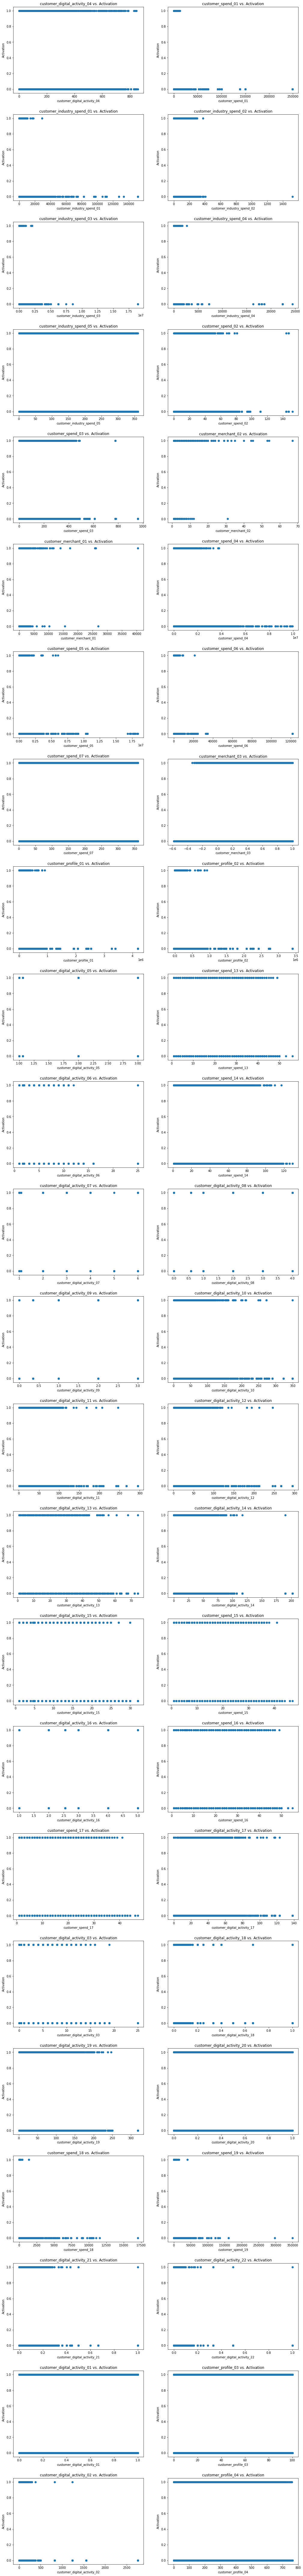

In [16]:
n = len(customer_columns)
nrows = int(np.ceil(n / 2))  
ncols = 2  
fig, axs = plt.subplots(nrows, ncols, figsize=(15, nrows * 5))  
fig.tight_layout(pad=5.0)
axs = axs.flatten()
for i, col in enumerate(customer_columns):
    axs[i].scatter(df_customer[col],df["activation"])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Activation")
    axs[i].set_title(f'{col} vs. {"Activation"}')

for ax in axs[i+1:]:
    ax.set_visible(False)

plt.show()

In [23]:
corr_dict = {}
for col in customer_columns:
    corr_dict[f"{col} vs. Activation: "] = df_customer[col].corr(df["activation"])

Top Correlations

In [28]:
{k: v for k, v in sorted(corr_dict.items(), key=lambda item: abs(item[1]), reverse=True)}

{'customer_industry_spend_05 vs. Activation: ': 0.0916385257939512,
 'customer_industry_spend_02 vs. Activation: ': 0.08847290033589303,
 'customer_spend_03 vs. Activation: ': 0.07377779594771137,
 'customer_digital_activity_22 vs. Activation: ': 0.0721915874054083,
 'customer_industry_spend_04 vs. Activation: ': 0.07196115992207167,
 'customer_spend_07 vs. Activation: ': 0.06768110087541819,
 'customer_merchant_03 vs. Activation: ': 0.055112587179429365,
 'customer_spend_06 vs. Activation: ': 0.05282135904087846,
 'customer_spend_02 vs. Activation: ': 0.05086455189555437,
 'customer_digital_activity_21 vs. Activation: ': 0.049431503113792866,
 'customer_profile_03 vs. Activation: ': 0.04703019316871074,
 'customer_digital_activity_20 vs. Activation: ': -0.03949774708395482,
 'customer_spend_16 vs. Activation: ': -0.03195572965453802,
 'customer_spend_04 vs. Activation: ': -0.02998402234128268,
 'customer_digital_activity_19 vs. Activation: ': 0.028487427233573823,
 'customer_spend_13 